In [1]:
import pandas as pd
import networkx as nx
import pylab as plt

## Google+ Social Circle Data
*https://snap.stanford.edu/data/egonets-Gplus.html*

### Descriptions of the files included gplus.tar.gz

**nodeId.edges:** The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

**nodeId.circles:** The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

**nodeId.feat:** The features for each of the nodes that appears in the edge file.

**nodeId.egofeat:** The features for the ego user.

**nodeId.featnames:** The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

### Read in the gplus data 
-  The raw data file contains the unique combination of edges and nodes for the above files. Source file: **gplus_combined.txt.gz**.	Edges from all egonets combined


In [28]:
#read in the consolidated gplus_combined.txt.gz	Edges from all egonets combined
initial_df = pd.read_table(r'C:\Users\burke\OneDrive\Desktop\Data 620\gplus_combined.csv', sep=' ',header = None, error_bad_lines=False).drop_duplicates()
initial_df.rename(columns = {0 : 'Nodes_1', 1 : 'Nodes_2'}, inplace = True)
initial_df['Edges'] = range(1, len(initial_df) +1)

In [30]:
initial_df['Edges']= initial_df['Edges'].astype(str)

### Data Summary

In [31]:
initial_df.describe()

,Nodes_1,Nodes_2,Edges
count,13673453,13673453,13673453
unique,72271,107596,13673453
top,106228758905254036967,111091089527727420853,10995085
freq,5056,17055,1


### Filter for a subset of nodes 
-  Data is too large- I decided to take a subset for the first analysis

In [32]:
filter_df = pd.DataFrame(initial_df['Nodes_1'].unique()).head(10)
subset = initial_df.loc[initial_df['Nodes_1'].isin(filter_df[0])]

In [33]:
subset.describe()

,Nodes_1,Nodes_2,Edges
count,7412,7412,7412
unique,10,4302,7412
top,116407635616074189669,116805285176805120365,398013
freq,1688,9,1


### Load the data into Networkx


In [35]:
test = nx.from_pandas_dataframe(subset , 'Nodes_1','Nodes_2', edge_attr = 'Edges')
test.edges(data = True)

EdgeDataView([('114096999830773780731', '107527001343993112621', {'Edges': '7157065'}), ('117500003827318237082', '117421021456205115327', {'Edges': '3310218'}), ('114985346359714431656', '116407635616074189669', {'Edges': '4448'}), ('107066609145001672622', '105706178492556563330', {'Edges': '390448'}), ('111065108889012087599', '105706178492556563330', {'Edges': '121971'}), ('110135934714655831184', '116374117927631468606', {'Edges': '6507983'}), ('109919679182093139567', '116374117927631468606', {'Edges': '963115'}), ('111491466248379228198', '107527001343993112621', {'Edges': '7035892'}), ('111491466248379228198', '116407635616074189669', {'Edges': '12668173'}), ('100918317905582587636', '116374117927631468606', {'Edges': '12712254'}), ('114113584202208995405', '116374117927631468606', {'Edges': '9119876'}), ('107959478034463437419', '116374117927631468606', {'Edges': '9144657'}), ('105757929388673748603', '116374117927631468606', {'Edges': '12783253'}), ('112617873637231221858', '

In [36]:
print "Nodes:", test.number_of_nodes()
print "Edges:", test.number_of_edges()

Nodes: 4302
Edges: 7403


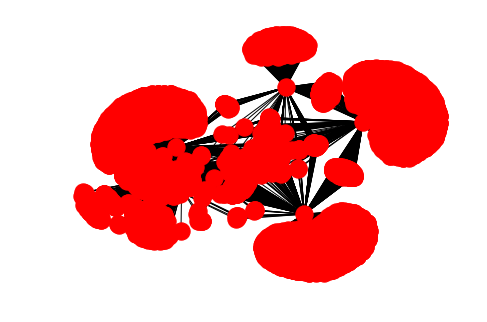

In [37]:
# draw the network# draw test 
%matplotlib inline
nx.draw(test) 